In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('Datasets/wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class Labels','Alcohol','Malic Acid']
df.head()

,Class Labels,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


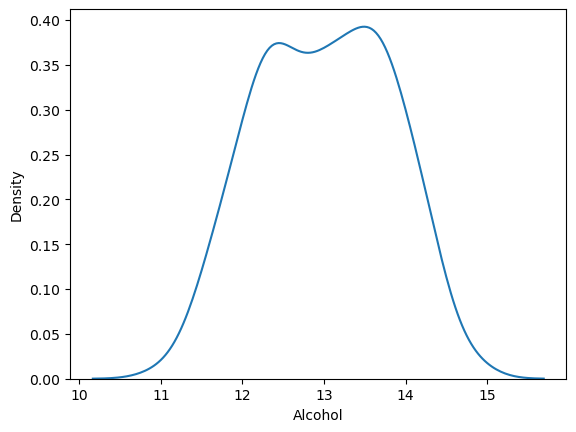

In [11]:
sns.kdeplot(df['Alcohol'])
plt.show()

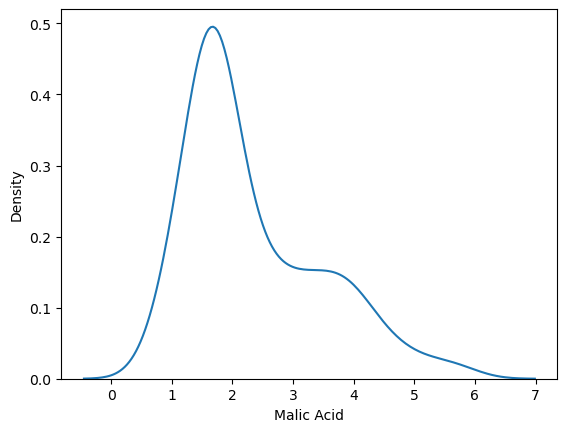

In [12]:
sns.kdeplot(df['Malic Acid'])
plt.show()

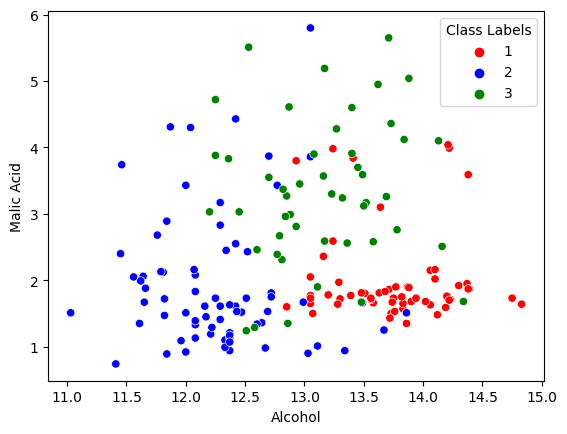

In [18]:
color_dict = {1:'red',2:'blue',3:'green'}
sns.scatterplot(x=df['Alcohol'],y=df['Malic Acid'],hue=df['Class Labels'],palette=color_dict)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df[['Alcohol','Malic Acid']],df['Class Labels'],test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [24]:
# fit the data to scaler it will learn the paramters
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_train_scaled,columns=X_test.columns)

In [26]:
np.round(df.describe(),1)

,Class Labels,Alcohol,Malic Acid
count,178.0,178.0,178.0
mean,1.9,13.0,2.3
std,0.8,0.8,1.1
min,1.0,11.0,0.7
25%,1.0,12.4,1.6
50%,2.0,13.0,1.9
75%,3.0,13.7,3.1
max,3.0,14.8,5.8


In [28]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


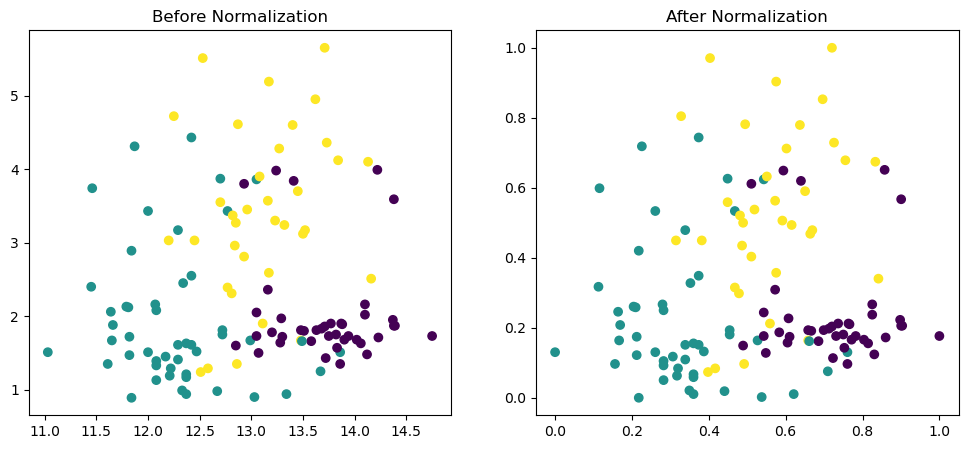

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Before Normalization")
ax1.scatter(X_train['Alcohol'],X_train['Malic Acid'],c=y_train)
ax2.set_title('After Normalization')
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic Acid'],c=y_train)
plt.show()

If we notice we have compressed the data into unit square area 

## KDES 

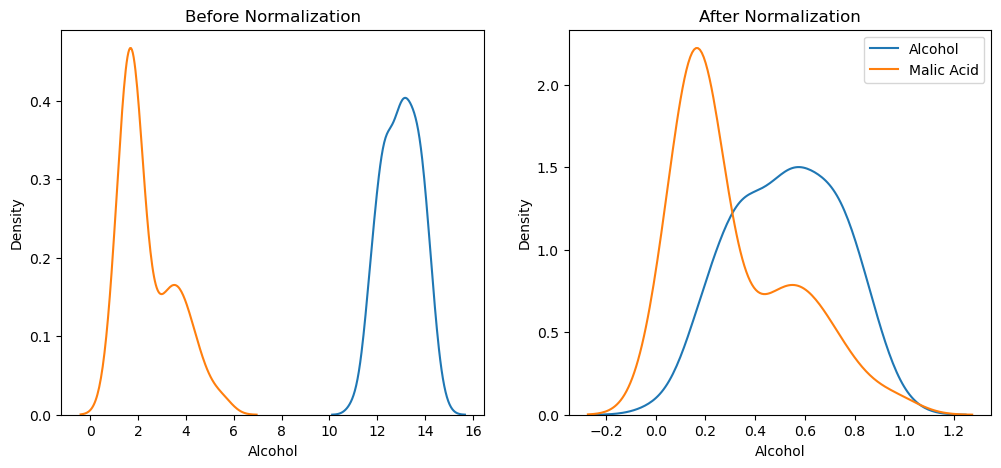

In [43]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title('Before Normalization')
sns.kdeplot(x=X_train['Alcohol'],ax=ax1,label='Alcohol')
sns.kdeplot(x=X_train['Malic Acid'],ax=ax1,label='Malic Acid')
ax2.set_title('After Normalization')
sns.kdeplot(x=X_train_scaled['Alcohol'],ax=ax2,label='Alcohol')
sns.kdeplot(x=X_train_scaled['Malic Acid'],ax=ax2,label='Malic Acid')
plt.legend()
plt.show()